### Min Max Scaling (Normalisation)
Min Max Scaling scales the values between 0 to 1.
X_scaled=(X-Xmin/Xmax-Xmin)

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('titanic.csv',usecols=['Pclass','Age','Fare','Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [4]:
#Now we use MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
data=min_max.fit_transform(df)
data

array([[0.        , 1.        , 0.27117366, 0.01415106],
       [1.        , 0.        , 0.4722292 , 0.13913574],
       [1.        , 1.        , 0.32143755, 0.01546857],
       ...,
       [0.        , 1.        ,        nan, 0.04577135],
       [1.        , 0.        , 0.32143755, 0.0585561 ],
       [0.        , 1.        , 0.39683338, 0.01512699]])

In [11]:
df_minmax=pd.DataFrame(data,columns=df.columns)
df_minmax.head()

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


In [6]:
#If we want to get the original value we use inverse_transform
min_max.inverse_transform(data)

array([[ 0.    ,  3.    , 22.    ,  7.25  ],
       [ 1.    ,  1.    , 38.    , 71.2833],
       [ 1.    ,  3.    , 26.    ,  7.925 ],
       ...,
       [ 0.    ,  3.    ,     nan, 23.45  ],
       [ 1.    ,  1.    , 26.    , 30.    ],
       [ 0.    ,  3.    , 32.    ,  7.75  ]])

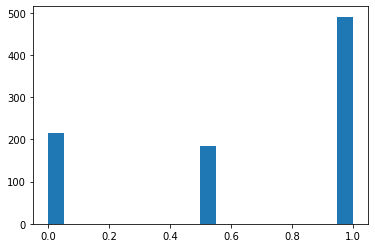

In [10]:
import matplotlib.pyplot as plt
plt.hist(df_minmax['Pclass'],bins=20)
plt.show()

## Standardization(Why standardization?)
Standardization comes into picture when features of input data set have large differences between their ranges, or simply when they are measured in different measurement units (e.g., Pounds, Meters, Miles … etc).

We try to bring all the variables or features to a similar scale. standarisation means centering the variable at zero.
z=(x-x_mean)/std

In [12]:
dataset=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived','Pclass'])
dataset.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [13]:
dataset.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [14]:
dataset['Age'].fillna(dataset['Age'].median(),inplace=True)

In [15]:
dataset.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [17]:
#now we are using standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(dataset)

In [20]:
df_scaled

array([[-0.78927234,  0.82737724, -0.56573646, -0.50244517],
       [ 1.2669898 , -1.56610693,  0.66386103,  0.78684529],
       [ 1.2669898 ,  0.82737724, -0.25833709, -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -0.1046374 , -0.17626324],
       [ 1.2669898 , -1.56610693, -0.25833709, -0.04438104],
       [-0.78927234,  0.82737724,  0.20276197, -0.49237783]])

## Robust Scaler
Robust Scaler are robust to outliers.It is used to scale the feature to median and quantiles Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:
IQR = 75th quantile - 25th quantile
X_scaled = (X - X.median) / IQR
0,1,2,3,4,5,6,7,8,9,10
9-90 percentile---90% of all values in this group is less than 9 1-10 precentile---10% of all values in this group is less than 1 4-40%

In [21]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived','Pclass'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [22]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [23]:
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [24]:
df.Age.isnull().sum()

0

In [30]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
df_robust=scaler.fit_transform(df)

In [32]:
df_robust

array([[ 0.        ,  0.        , -0.46153846, -0.3120106 ],
       [ 1.        , -2.        ,  0.76923077,  2.46124229],
       [ 1.        ,  0.        , -0.15384615, -0.28277666],
       ...,
       [ 0.        ,  0.        ,  0.        ,  0.38960398],
       [ 1.        , -2.        , -0.15384615,  0.67328148],
       [ 0.        ,  0.        ,  0.30769231, -0.29035583]])

In [33]:
df_scaled=pd.DataFrame(df_robust)

In [35]:
df_scaled.head()

,0,1,2,3
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363


## Guassian Transformation
Some machine learning algorithms like linear and logistic assume that the features are normally distributed
-Accuracy
-Performance
- logarithmic transformation
- reciprocal transformation
- square root transformation
- exponential transformation (more general, you can use any exponent)
- boxcox transformation
